In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn. linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [7]:
X, y = iris['data'], (iris['target'] == 1).astype(int)

In [8]:
y = np.where(y == 1, ['versicolor'], ['not'])

In [9]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3)

In [11]:
y_train.shape

(105,)

In [12]:
rfc = RandomForestClassifier(30)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
log_reg.classes_

array(['not', 'versicolor'],
      dtype='<U10')

In [15]:
rfc.classes_

array(['not', 'versicolor'],
      dtype='<U10')

In [16]:
rfc.predict_proba(X_test)

array([[ 0.73333333,  0.26666667],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.23333333,  0.76666667],
       [ 0.03333333,  0.96666667],
       [ 1.        ,  0.        ],
       [ 0.46666667,  0.53333333],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.33333333,  0.66666667],
       [ 0.16666667,  0.83333333],
       [ 0.03333333,  0.96666667],
       [ 0.96666667,  0.03333333],
       [ 0.96666667,  0.03333333],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.93333333,  0.06666667],
       [ 0.        ,  1.        ],
       [ 0.        ,

In [17]:
log_probs = log_reg.predict_proba(X_test)

In [18]:
def predict(model, X, threshold=0.5):
    '''Return prediction of the fitted binary-classifier model model on X using
    the specifed `threshold`. NB: class 0 is the positive class'''
    return np.where(model.predict_proba(X)[:, 0] > threshold,
                    model.classes_[0],
                    model.classes_[1])

def confusion_matrix(model, X_test, y_test, threshold=0.5):
    cf = pd.crosstab(y_test, predict(model, X_test, threshold))
    cf.index.name = 'actual'
    cf.columns.name = 'predicted'
    return cf.values

In [19]:
pedal_conf = confusion_matrix(log_reg, X_test, y_test, .5)

In [20]:
pedal_conf

array([[25,  7],
       [ 8,  5]])

In [21]:
# 
cost_matrix = pd.DataFrame([[100, 100], [1000, 0]], columns=["Failure", "Nominal"], index=["Failure", "Nominal"])
cost_matrix.index.name = 'predicted'
cost_matrix.columns.name = 'actual'

In [22]:
cost_matrix

actual,Failure,Nominal
predicted,,
Failure,100,100
Nominal,1000,0


In [32]:
cost_matrix_np = np.array([[-100, 0], [-1000, 100]])

In [33]:
def calculate_payout(cb_matrix, model, X, y, threshold):
    return (confusion_matrix(model, X, y, threshold) * cb_matrix).sum()

Text(0.5,0,'thresholds')

Text(0,0.5,'losses')

Text(0.5,1,'Profit Curve')

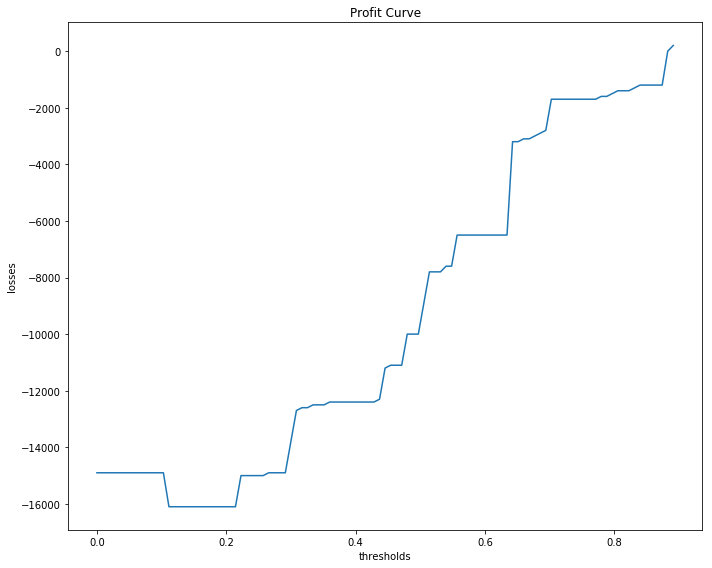

In [34]:
thresholds = np.linspace(0, .9, 105, endpoint=False)

fig, ax = plt.subplots(figsize=(10, 8))

profits = []
for threshold in thresholds:
    profits.append(calculate_payout(cost_matrix_np, log_reg, X_test, y_test, threshold))
ax.plot(thresholds, np.array(profits))
ax.set_xlabel('thresholds')
ax.set_ylabel('losses')
ax.set_title('Profit Curve')
fig.tight_layout()

In [26]:
thresholds = np.arange(0, 1, 105)

In [27]:
type(int(thresholds[0]))

int

In [28]:
thresh_losses = [{'threshold': threshold, 'loss': int(loss)} for threshold, loss in zip(thresholds, profits)]

In [29]:
# import json
# with open('thresh_losses.json', 'w') as f:
#     json.dump(thresh_losses, f)

TypeError: Object of type 'int64' is not JSON serializable

In [ ]:
thresh_losses